In [1]:
# 로이터 데이터
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

# Data가 너무 많아지는 걸 방지 하기위해 자주쓰는 단어 10000개를 뽑기

In [2]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [4]:
# 훈련데이터와 테스트 데이터의 벡터 변환

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# 라벨 데이터를 카테고리 데이터로 전환

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# 1차 모델 구성

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
# 모델 Compile

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [8]:
# 데이터 나누기

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
# 데이터 Training

history = model.fit(partial_x_train,
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.7199 - accuracy: 0.4555 - val_loss: 1.7882 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.4959 - accuracy: 0.6889 - val_loss: 1.3465 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1521 - accuracy: 0.7542 - val_loss: 1.1696 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9404 - accuracy: 0.7969 - val_loss: 1.0974 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7825 - accuracy: 0.8314 - val_loss: 1.0171 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6564 - accuracy: 0.8583 - val_loss: 0.9447 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5469 - accuracy: 0.8851 - val_loss: 0.9152 - val_accuracy: 0.8080
Epoch 8/20
16

In [10]:
# 결과 시각화

import matplotlib.pyplot as plt

In [11]:
# 4가지 결과 값 가져오기

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

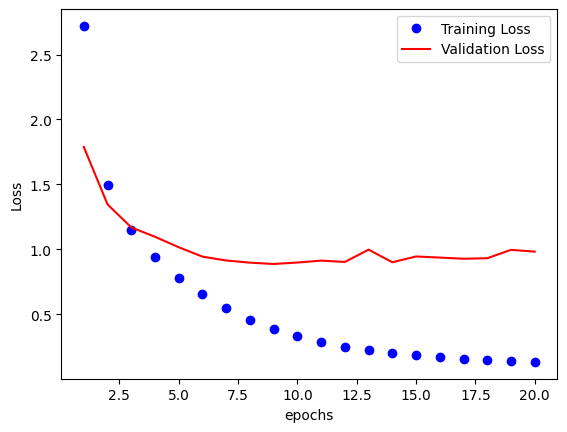

In [12]:
# Loss 그래프
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r-', label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

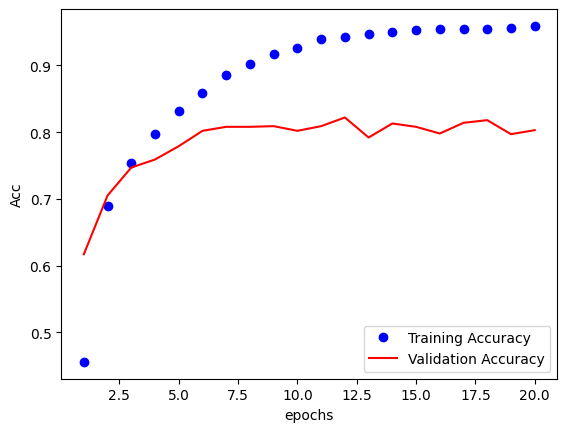

In [13]:
# Accuracy 그래프

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()
# 11번째 부터 Training data에 과대적합(Overfitting)이 시작됨.
# 11번째 까지 다시 돌려보기

In [14]:
# 2차 모델 구성 (검증된 결과로 다시 학습)
# 데이터 나누기는 이미 나눠져 있음.

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 2차 Compile

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

# 2차 Train

history = model.fit(partial_x_train,
                     partial_y_train,
                     epochs=11,
                     batch_size=512,
                     validation_data=(x_val,y_val))

Epoch 1/11
16/16 [==============================] - 1s 25ms/step - loss: 2.7355 - accuracy: 0.4823 - val_loss: 1.8173 - val_accuracy: 0.6100
Epoch 2/11
16/16 [==============================] - 0s 18ms/step - loss: 1.5634 - accuracy: 0.6695 - val_loss: 1.3946 - val_accuracy: 0.6920
Epoch 3/11
16/16 [==============================] - 0s 16ms/step - loss: 1.2108 - accuracy: 0.7367 - val_loss: 1.2172 - val_accuracy: 0.7380
Epoch 4/11
16/16 [==============================] - 0s 17ms/step - loss: 1.0024 - accuracy: 0.7805 - val_loss: 1.1079 - val_accuracy: 0.7540
Epoch 5/11
16/16 [==============================] - 0s 16ms/step - loss: 0.8256 - accuracy: 0.8181 - val_loss: 1.0265 - val_accuracy: 0.7840
Epoch 6/11
16/16 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.8487 - val_loss: 0.9869 - val_accuracy: 0.7900
Epoch 7/11
16/16 [==============================] - 0s 18ms/step - loss: 0.5785 - accuracy: 0.8746 - val_loss: 0.9458 - val_accuracy: 0.8110
Epoch 8/11
16

In [15]:
# 검증 결과로 다시 테스트
eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

# 결과값은 % 수치가 아니다.

71/71 [==============================] - 0s 2ms/step - loss: 0.9773 - accuracy: 0.7836
[0.9773015379905701, 0.7836152911186218]


언어 모델 Language Model

현재 gpt : Large Language Model(LLM)을 가지고 만듬
업 스트림에서 데이터 학습을 하고 전이를 새로운 데이터를 넣고 파인 튜닝으로 더욱 정확도를 높임
더 큰 모델일 수록 정확도는 더 높아짐

단어() <- 괄호 안에 들어갈 다음 단어에 대해 가중치를 두어서 말을 만들어 냄 -> gpt
장점 : 데이터를 훨씬 많이 만들어 낼 수 있다.

단어()단어 <- 가운데 들어가는 () 단어(masked language model -> bert)
딘점 : 학습 시키는게 어렵다.

연결선(parameter)이 많을 수록 데이터가 많아짐

instruct gpt(구조화된 gpt)에 채팅 기능을 붙인게 chat gpt
언어 모델에 safety 필터를 붙여서 안정성을 붙임